In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from qiskit.primitives import Sampler,Estimator
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient
from qiskit.circuit import ParameterVector
%matplotlib inline

/tmp/ipykernel_504/596542750.py:9: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient


In [5]:
from VQS_header import compute_params_list,compute_magnetization,make_magnetization_op,compute_energy, compute_energyGrad

In [65]:
num_qubits = 3
j_coupling = 1/4
h_coupling = 1

num_layers = 5
time_max = 5e0
epsilon_det = 1e-7
num_steps = 500
sampler = Sampler()
estimator = Estimator()
nShots = None

dt=time_max/num_steps
sampler=Sampler()
estimator=Estimator()
num_params = (2*num_qubits-1)*num_layers
print("dt = ",dt)

dt =  0.01


In [66]:
tmp_time_max_list=np.array([1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1e0])
nSample = 100
tmp_num_steps=2

In [67]:
params_init_all = np.random.rand(nSample,num_params)*2*np.pi

In [68]:
avg_E_diff=[]
var_E_diff=[]
for tmp_time_max in tmp_time_max_list:
    print(tmp_time_max)
    E_diff_list = []
    for i in range(len(params_init_all)):
        params_init = params_init_all[i]
        tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
                        tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
                       alpha=0.)
        E_diff = tmp_E_list[1]-tmp_E_list[0]
        E_diff_list.append(E_diff)


    E_diff_list = np.array(E_diff_list)
    avg_E_diff.append(abs(E_diff_list).mean())
    var_E_diff.append(abs(E_diff_list).var())
    print("avg E diff = ", abs(E_diff_list).mean())
    print("var E diff = ",abs(E_diff_list).var())

avg_E_diff = np.array(avg_E_diff)
var_E_diff = np.array(var_E_diff)

0.0001
avg E diff =  1.8893179291878947e-09
var E diff =  2.9268175491423405e-18
0.0005
avg E diff =  4.7264074649958076e-08
var E diff =  1.8134705618433803e-15
0.001
avg E diff =  1.890742559837108e-07
var E diff =  2.8982942863855066e-14
0.005
avg E diff =  4.727346472782543e-06
var E diff =  1.8090370921645746e-11
0.01
avg E diff =  1.891007155927566e-05
var E diff =  2.8924135535879467e-10
0.05
avg E diff =  0.000472702940090071
var E diff =  1.7980105438450557e-07
0.1
avg E diff =  0.0018895029120937728
var E diff =  2.852246230833984e-06
0.5
avg E diff =  0.04561002261582009
var E diff =  0.0015799153340861501
1.0
avg E diff =  0.1664191236238419
var E diff =  0.018343352938723214


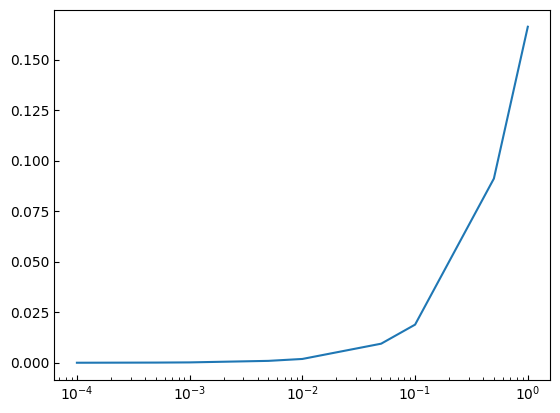

In [71]:
plt.plot(tmp_time_max_list,avg_E_diff/tmp_time_max_list)
plt.xscale('log')

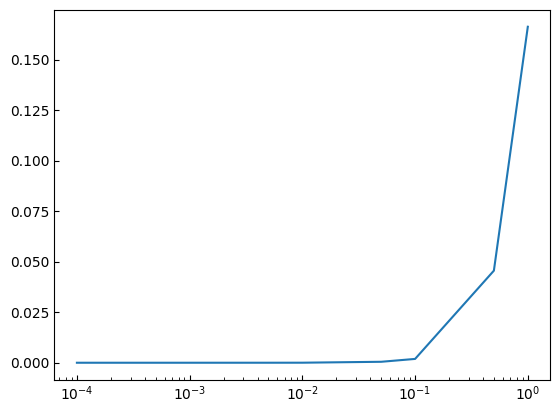

In [72]:
plt.plot(tmp_time_max_list,avg_E_diff)
plt.xscale('log')